Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree and Random forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

##Decision Tree and Random Forest Classifier

In [ ]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#Loading the data
company=pd.read_csv('/content/Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.shape

(400, 11)

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


No null objects are found

In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000




*  Sales: The sales ranges from no sales(0) to 16. 75% of the sales are below 9.32. Therefore, we can consider 9 as our threshold and divide the data as Low and High sales




In [ ]:
company.describe(include='O')

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


Most of the shelf location quality is Medium.
Most of the stores(75%) are in Urban location.
Many stores are in the US

In [ ]:
#Create dummy variables for Shelveloc,US and Urban
company=pd.get_dummies(company,columns=['ShelveLoc','US','Urban'], drop_first=True)

In [ ]:
#0='low',1='high'
company['Sales']=np.where(company['Sales']<=9,'0','1') 

In [ ]:
company.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,1,138,73,11,276,120,42,17,0,0,1,1
1,1,111,48,16,260,83,65,10,1,0,1,1


In [ ]:
company['Sales'].value_counts()

0    287
1    113
Name: Sales, dtype: int64

In [ ]:
# Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df_norm= MinMaxScaler().fit_transform(company)
df_norm=pd.DataFrame(df_norm)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0
1,1.0,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0
2,1.0,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0
3,0.0,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0
4,0.0,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,0.0,1.0


In [ ]:
#Extract the features
X=df_norm.iloc[:,1:].values
y=df_norm.iloc[:,0].values

In [ ]:
print(X.shape)
print(y.shape)

(400, 11)
(400,)


In [ ]:
# Splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 11) (80, 11) (320,) (80,)


Decision Tree Classification Model

In [ ]:
dec_class = DecisionTreeClassifier( random_state = 0)
dec_class.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
train_pred = dec_class.predict(X_train)
y_pred=dec_class.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
print(accuracy_score(y_train, train_pred))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
print(accuracy_score(y_test, y_pred))

[[234   0]
 [  0  86]]
1.0
[[46  7]
 [ 9 18]]
0.8


We can see that our model is overfitting with train set accuracy score 1. Therefore, we need to optimize our model parameters. This is done by either Post pruning or Pre pruning.

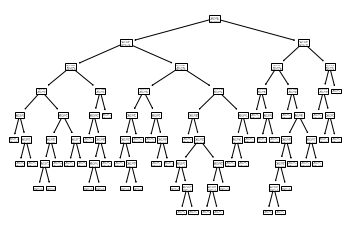

In [ ]:
#PLot the decision tree
tree.plot_tree(dec_class);

Text(0, 0.5, 'True Positive Rate')

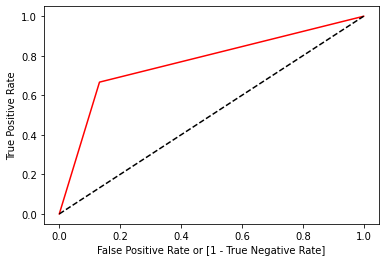

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, dec_class.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
print(auc)

0.7672955974842767


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,30,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=dec_class,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                  

In [ ]:
#Get the best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


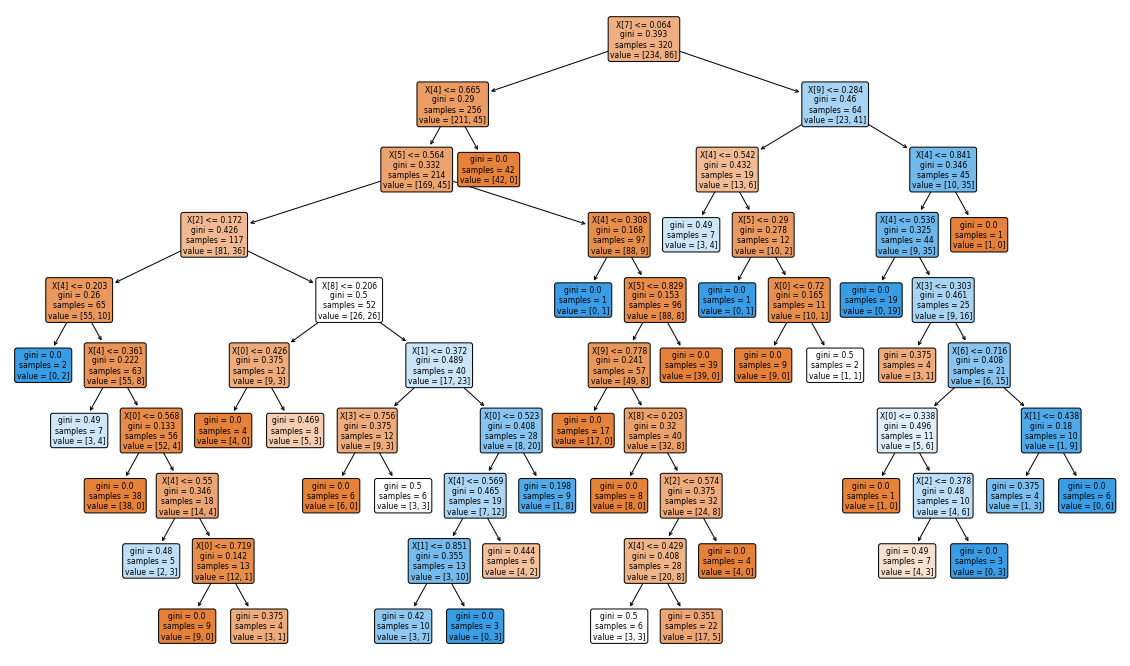

In [ ]:
classifier=DecisionTreeClassifier(criterion= 'gini',max_depth= 9,min_samples_leaf= 1,min_samples_split= 10,splitter= 'random')
classifier.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(classifier,rounded=True,filled=True)
plt.show()

After Pre-pruning (after choosing the best parameters)

In [ ]:
train_pred = classifier.predict(X_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
train_acc=round(accuracy_score(y_train, train_pred)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[221  13]
 [ 22  64]]
Accuracy of train dataset:89.062%
[[48  5]
 [11 16]]
Accuracy of test dataset:80.0%


Text(0, 0.5, 'True Positive Rate')

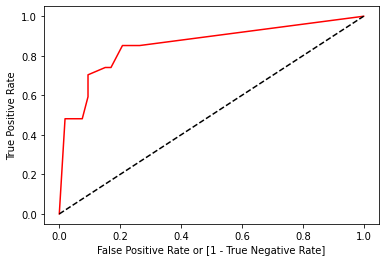

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
print(auc)

0.7491264849755416


##Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# More the estimators, lesser chance of overfitting, choose max_depth between 5-15.
forest_class = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_split=20,criterion='entropy')
forest_class.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_pred = forest_class.predict(X_train)
y_pred=forest_class.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
train_acc=round(accuracy_score(y_train, train_pred)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[230   4]
 [ 17  69]]
Accuracy of train dataset:93.438%
[[51  2]
 [13 14]]
Accuracy of test dataset:81.25%


In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.79      0.94      0.86        53\n         1.0       0.82      0.52      0.64        27\n\n    accuracy                           0.80        80\n   macro avg       0.81      0.73      0.75        80\nweighted avg       0.80      0.80      0.79        80\n'